Average Profit per Order: ₹48.26
Risk of Loss (Profit < 0): 2.20%


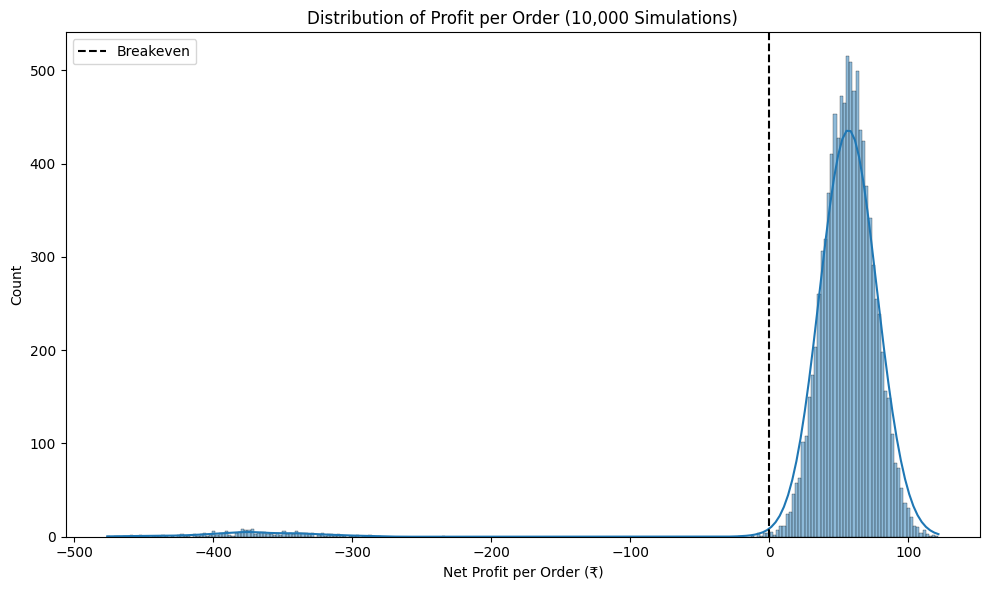

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. ARCHITECT INPUTS (Business Assumptions) ---

SIMULATIONS = 10_000

# Revenue Drivers (Zomato FY24-style)
AOV_MEAN = 428          # Average Order Value (₹)
AOV_SD   = 50           # Basket size variability
COMMISSION_RATE = 0.225 # 22.5% commission from restaurant
DELIVERY_FEE    = 35    # Paid by customer (₹)

# Cost Drivers (Platform-side)
RIDER_MEAN = 32         # Avg payout to rider per order (₹)
RIDER_SD   = 10         # Variation due to rain/traffic/surge

PACK_MEAN  = 12         # Packaging / ops handling cost (₹)
PACK_SD    = 3

MKT_MEAN   = 20         # CAC / promo cost allocated per order (₹)
MKT_SD     = 10

GATEWAY_RATE = 0.024    # Payment gateway fee = 2.4% of AOV
RETURN_PROB  = 0.02     # 2% of orders effectively refunded

# --- 2. MONTE CARLO ENGINE (Simulation) ---

np.random.seed(42)  # for reproducibility

# Random draws for each virtual order
aov            = np.random.normal(AOV_MEAN, AOV_SD, SIMULATIONS)
rider_cost     = np.random.normal(RIDER_MEAN, RIDER_SD, SIMULATIONS)
packaging_cost = np.random.normal(PACK_MEAN, PACK_SD, SIMULATIONS)
marketing_cost = np.random.normal(MKT_MEAN, MKT_SD, SIMULATIONS)

gateway_fee = aov * GATEWAY_RATE
returns_flag = np.random.binomial(1, RETURN_PROB, SIMULATIONS)  # 0 or 1
refund_loss = aov * returns_flag                                # lose full AOV when refunded

# Platform Revenue per order
revenue = (aov * COMMISSION_RATE) + DELIVERY_FEE

# Platform Costs per order
total_cost = rider_cost + packaging_cost + marketing_cost + gateway_fee + refund_loss

# Net Profit per Order
profit = revenue - total_cost

# --- 3. ANALYST DASHBOARD (Metrics + Plot) ---

profit_mean = profit.mean()
loss_probability = (profit < 0).mean() * 100  # in %

print(f"Average Profit per Order: ₹{profit_mean:.2f}")
print(f"Risk of Loss (Profit < 0): {loss_probability:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(profit, kde=True)
plt.axvline(0, color='black', linestyle='--', label='Breakeven')
plt.title('Distribution of Profit per Order (10,000 Simulations)')
plt.xlabel('Net Profit per Order (₹)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()
